In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.metrics import mean_squared_error
import cvxpy as cp
# Generate a toy dataset

def data(nsamples,ndim):
    X, Y = datasets.make_regression(n_samples=nsamples, n_features=ndim,
                                    n_informative = ndim,noise = 0,random_state=None)
    
    #X_Train = X
    #Y_train = np.reshape(Y, (len(Y), 1))
    #     X_train = X_train+np.random.normal(0,0.01,X_train.shape)
#     X = X - np.reshape(np.mean(X,1), (len(np.mean(X,1)), 1))
    X = X/np.std(X)
#     print(np.mean(X,1))
#     print(np.std(X))
#     Y = Y - np.mean(Y)
    Y = Y/np.std(Y)
    
    Y = Y+np.random.normal(0,0.1,Y.shape)
    X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.2,
                                                        random_state=42)
    
    # r = np.ones(X.shape[0])
    # X = np.insert(X, 0, r, axis=1)
    #X_train = X_train - np.reshape(np.mean(X_train,1), (len(np.mean(X_train,1)), 1))
#     X_train = X_train/np.linalg.norm(X_train)
#     X_test = X_test / np.linalg.norm(X_test)
    return X_train,X_test, Y_train , Y_test



def leastsquare(x_train, y_train):
    # LS
    w_l = np.linalg.pinv(x_train).dot(y_train).ravel()
    return w_l.ravel()

In [145]:
n_samples = 200
dim = 100
n_sampels_list = np.arange(2, 200, 2)
testerrsa = np.zeros(n_sampels_list.shape[0])
trainerrsa = np.zeros(n_sampels_list.shape[0])
for i in range(0,40,1):
    testerrs = []
    trainerrs =[]
    X_train, X_test, Y_train, Y_test = data(n_samples, dim)
    yt = Y_test
    xt=X_test
    for sampel in n_sampels_list:
        #print(sampel)
#        x, xt, y, yt = data(sampel, dim)
        x=X_train[:sampel,:]
#         print(x.shape)
        
        y = Y_train[:sampel]
        
        #print(x.shape)
        w_l = leastsquare(x, y)

        testerr = mean_squared_error(xt@w_l , yt)
        testerrs.append(testerr)
        trainerr = mean_squared_error(x@w_l , y)
        trainerrs.append(trainerr)
    testerrsa = testerrsa+np.array(testerrs)
    trainerrsa = trainerrsa + np.array(trainerrs)

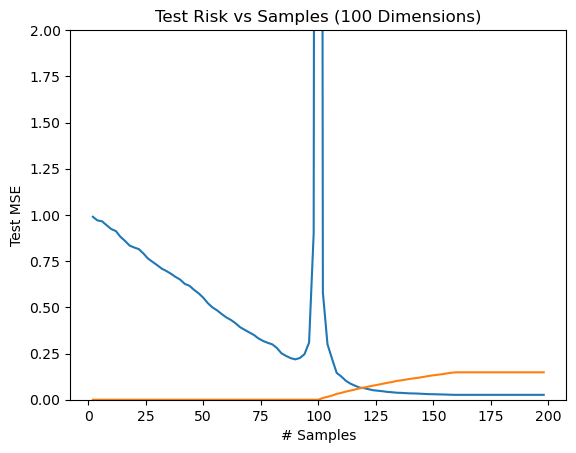

In [151]:

plt.plot(n_sampels_list , testerrsa/40 )
# plt.plot(n_features_list / 100, testerrsa / 40)
plt.plot(n_sampels_list , trainerrsa )
plt.title("Test Risk vs Samples (100 Dimensions)")
plt.xlabel("# Samples")
# plt.ylim(10**-1,10**5)
plt.ylim(0,2)
# plt.xlim(0,3)
# plt.yscale('log')

plt.ylabel("Test MSE")
plt.show()

In [136]:
testerrsa = np.zeros(n_features_list.shape[0])
trainerrsa = np.zeros(n_features_list.shape[0])
n_samples = 125
dim = 300
n_features_list = np.arange(0, dim+1, 1)

for i in range(0,40,1):
    testerrs = []
    trainerrs =[]
    X_train, X_test, Y_train, Y_test = data(n_samples, dim)
    for feature in n_features_list:
        x=X_train[:,:feature]
        xt=X_test[:,:feature]

        #print(x.shape)
        w_l = leastsquare(x, Y_train)

        testerr = mean_squared_error(xt@w_l , Y_test)
        testerrs.append(testerr)
        trainerr = mean_squared_error(x@w_l , Y_train)
        trainerrs.append(trainerr)
    testerrsa = testerrsa+np.array(testerrs)
    trainerrsa = trainerrsa + np.array(trainerrs)

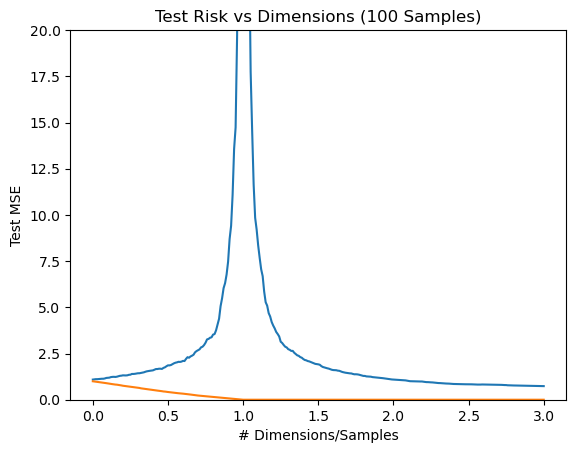

In [142]:

plt.plot(n_features_list / 100, testerrsa / 40)
# plt.plot(n_features_list / 100, testerrsa / 40)
plt.plot(n_features_list / 100, trainerrsa / 40)
plt.title("Test Risk vs Dimensions (100 Samples)")
plt.xlabel("# Dimensions/Samples")
# plt.ylim(10**-1,10**5)
plt.ylim(0,20)
# plt.xlim(0,3)
# plt.yscale('log')

plt.ylabel("Test MSE")
plt.show()